**QUESTION I**

1. Implement StandardScaler manually
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement Linear Regression using Gradient Descent.
3. Add L2 Regularization (Ridge Regression)
4. Plot:
   - Loss vs iterations
   - True vs predicted values

In [3]:
import numpy as np

class StandardScaler: #To store statistics from the data
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X): #Computes statistics from the data
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X): #Standardize the data using stored statistics
        return (X - self.mean) / self.std

    def fit_transform(self, X): #Convenience function
        self.fit(X)
        return self.transform(X)

**Cost Function (MSE + Ridge)**

$$
J(\theta) = \frac{1}{2m}\sum (y - \hat{y})^2 + \frac{\lambda}{2m}\sum \theta_j^2
$$


In [4]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, n_iters=1000, lambda_=0.0):
        self.lr = lr
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.theta = None
        self.losses = []

    def compute_loss(self, X, y):
        m = len(y)
        y_pred = X @ self.theta
        mse = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        reg = (self.lambda_ / (2 * m)) * np.sum(self.theta[1:] ** 2)
        return mse + reg

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        for _ in range(self.n_iters):
            y_pred = X @ self.theta
            error = y_pred - y

            grad = (1 / m) * (X.T @ error)
            grad[1:] += (self.lambda_ / m) * self.theta[1:]

            self.theta -= self.lr * grad
            self.losses.append(self.compute_loss(X, y))

    def predict(self, X):
        return X @ self.theta


In [5]:
#Example
# Dummy dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 5 + np.random.randn(100)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Train model
model = LinearRegressionGD(lr=0.1, n_iters=1000, lambda_=0.1)
model.fit(X_scaled, y)

# Predictions
y_pred = model.predict(X_scaled)


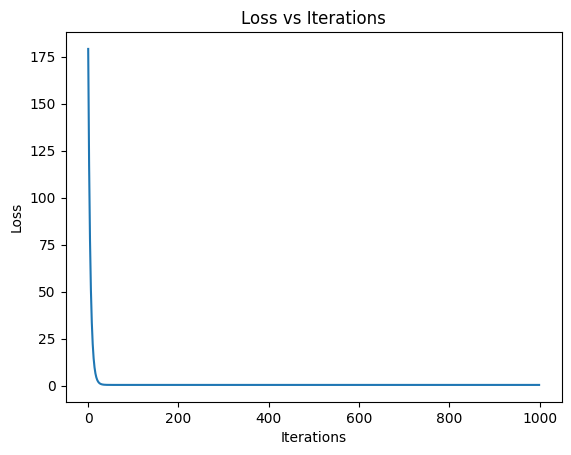

In [6]:
#Loss vs Iterations
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

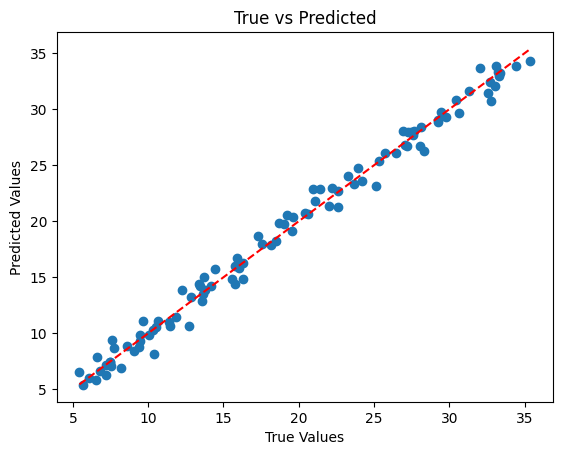

In [7]:
#True vs Predicted Values
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

**QUESTION II**

Logistic Regression from Scratch  
### (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy


## Logistic Regression (Gradient Descent + L2)

### Sigmoid Function
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

### Binary Cross Entropy Loss (with L2 Regularization)
$$
J(\theta) =
-\frac{1}{m}
\sum_{i=1}^{m}
\left[
y_i \log(\hat{y}_i)
+
(1 - y_i)\log(1 - \hat{y}_i)
\right]
+
\frac{\lambda}{2m}
\sum_{j=1}^{n}
\theta_j^2
$$


In [8]:
class LogisticRegressionGD:

    def __init__(self, lr=0.01, n_iters=1000, lambda_=0.0):
        self.lr = lr
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.theta = None
        self.losses = []

    def sigmoid(self, z): # Sigmoid activation
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        m = len(y)
        y_hat = self.sigmoid(X @ self.theta)

        eps = 1e-9  # to avoid log(0)(Numerical stability)
        bce = -(1/m) * np.sum(
            y * np.log(y_hat + eps) +
            (1 - y) * np.log(1 - y_hat + eps)
        )

        reg = (self.lambda_/(2*m)) * np.sum(self.theta[1:]**2)
        return bce + reg # Total loss

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        for _ in range(self.n_iters):
            y_hat = self.sigmoid(X @ self.theta)
            error = y_hat - y

            grad = (1/m) * (X.T @ error)
            grad[1:] += (self.lambda_/m) * self.theta[1:]

            self.theta -= self.lr * grad
            self.losses.append(self.compute_loss(X, y))

    def predict_proba(self, X):
        return self.sigmoid(X @ self.theta) # Probabilities

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)  # Class labels


In [9]:
# Example
np.random.seed(0)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Train model
model = LogisticRegressionGD(lr=0.1, n_iters=1000, lambda_=0.1)
model.fit(X_scaled, y)


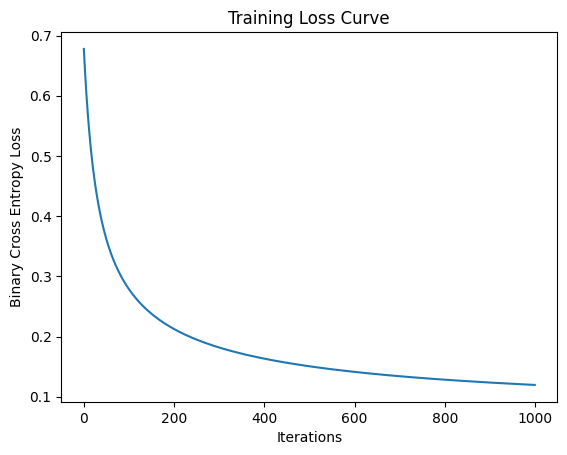

In [10]:
# Plot: Training Loss Curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.show()


In [11]:
y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)

print("Final Training Accuracy:", accuracy)


Final Training Accuracy: 0.995


**QUESTION III**

## K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values


In [13]:
import numpy as np

def kmeans_matrix(M, k, max_iters=100):

    # Flatten matrix values to 1D array
    values = M.flatten()
    n_elements = values.shape[0]

    # Randomly initialize centroids from matrix values
    centroids = np.random.choice(values, size=k, replace=False)

    for _ in range(max_iters):
        distances = np.abs(values[:, None] - centroids[None, :])
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([
            values[labels == i].mean() if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    assignment_table = labels.reshape(M.shape)

    # Build cookbook: cluster -> list of (i, j)
    cookbook = {i: [] for i in range(k)}
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids


In [14]:
#Example
np.random.seed(0)
M = np.random.rand(4, 5)
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print("Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook:")
for c, positions in cookbook.items():
    print(f"Cluster {c}: {positions}")


Matrix M:
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]]

Assignment Table:
 [[2 0 2 2 2]
 [2 2 0 0 2]
 [0 2 2 0 1]
 [1 1 0 0 0]]

Centroids:
 [0.84609194 0.05946125 0.52044191]

Cookbook:
Cluster 0: [(0, 1), (1, 2), (1, 3), (2, 0), (2, 3), (3, 2), (3, 3), (3, 4)]
Cluster 1: [(2, 4), (3, 0), (3, 1)]
Cluster 2: [(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 4), (2, 1), (2, 2)]
